## Context
Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

## Content
The database is composed by 10 different hand-gestures that were performed by 10 different subjects (5 men and 5 women).

In [21]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [22]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = r"E:\prodigy\hand gesture recognition model task 4\leapGestRecog"

## The Data

In [23]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [24]:
# shuffle the input data
import random
random.shuffle(image_data)

In [25]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [26]:
label[:10]

[1, 9, 6, 8, 2, 8, 2, 0, 0, 9]

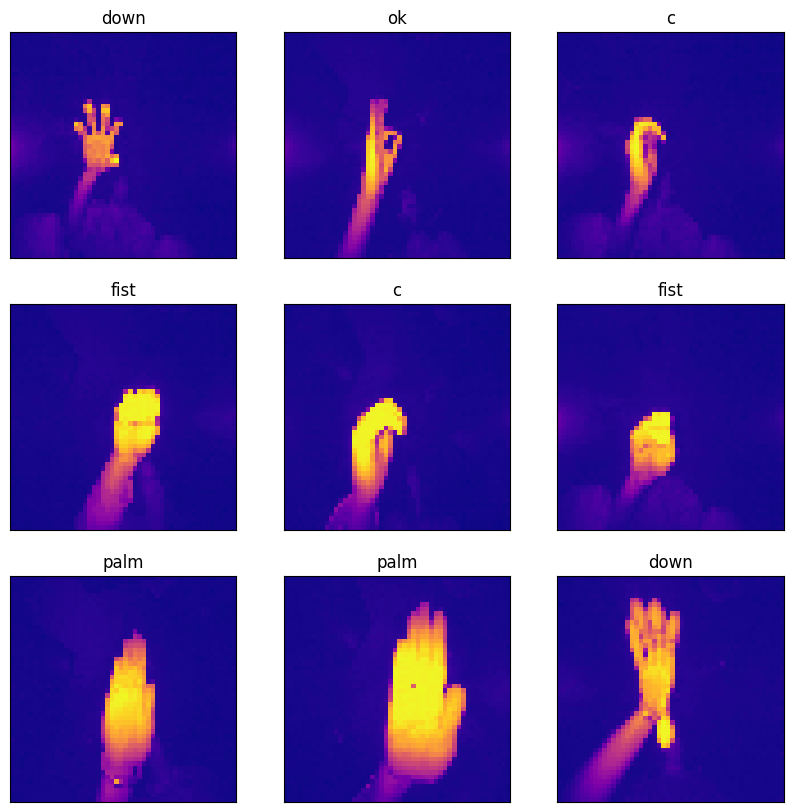

In [27]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='plasma')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [28]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [29]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [30]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [31]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

## Model Activation

In [32]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))
model.save('hgr.h5')

Epoch 1/7
438/438 [==============================] - 21s 47ms/step - loss: 0.3750 - accuracy: 0.8774 - val_loss: 0.0133 - val_accuracy: 0.9973
Epoch 2/7
438/438 [==============================] - 21s 47ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 3/7
438/438 [==============================] - 21s 48ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 4/7
438/438 [==============================] - 21s 48ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0032 - val_accuracy: 0.9997
Epoch 5/7
438/438 [==============================] - 21s 47ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0170 - val_accuracy: 0.9957
Epoch 6/7
438/438 [==============================] - 21s 47ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 7/7
438/438 [==============================] - 21s 47ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9998

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 32)        0         
                                                      

## Model Plot

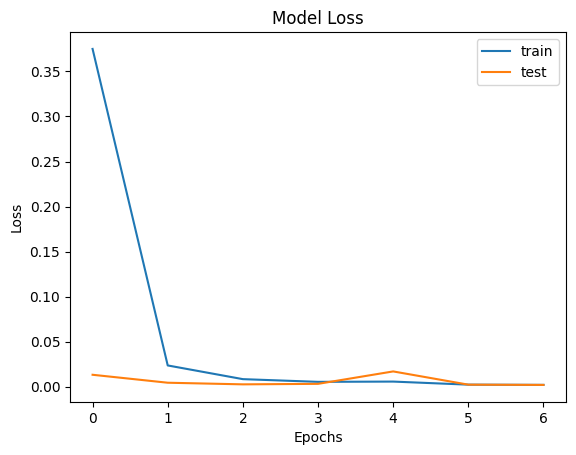

In [35]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

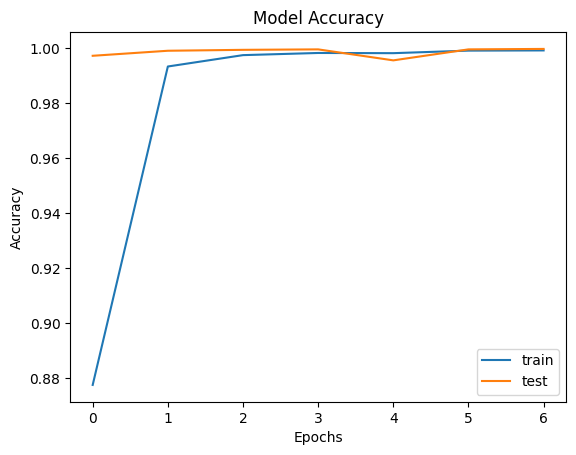

In [36]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [37]:
# calculate loss and accuracy on test 

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 2s 10ms/step - loss: 0.0021 - accuracy: 0.9998
Test accuracy: 99.98%


## Confusion Matrix

188/188 [==============================] - 2s 10ms/step


[]

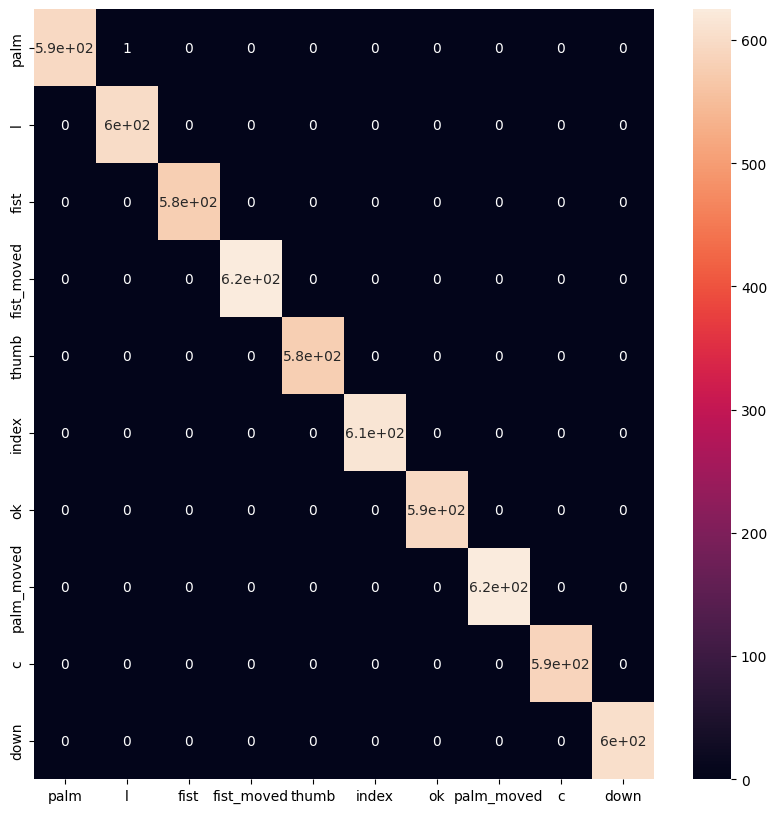

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

1/1 [==============================] - 0s 48ms/step


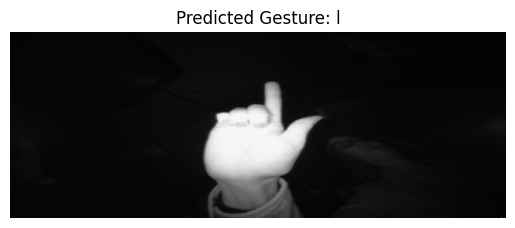

In [39]:
model = keras.models.load_model('hgr.h5')

# Load and preprocess the test image
# Replace 'test_image.jpg' with the path to your test image.
test_image_path = r'E:\prodigy\hand gesture recognition model task 4\leapGestRecog\00\02_l\frame_00_02_0001.png'
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (IMG_SIZE, IMG_SIZE))
test_image = test_image / 255.0  # Normalize pixel values
test_image = test_image.reshape(1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for model input

# Make predictions on the test image
predictions = model.predict(test_image)

# Map the predicted class to the hand gesture category
predicted_class = np.argmax(predictions)
gesture_category = CATEGORIES[predicted_class][3:]

# Display the test image and the predicted gesture
plt.figure()
plt.imshow(cv2.imread(test_image_path))
plt.title(f'Predicted Gesture: {gesture_category}')
plt.axis('off')
plt.show()